# Jonathan Halverson
# Thursday, March 10, 2016

# Spearman versus Pearson correlation

### Spearman uses the rank instead of the raw data. It is less sensitive to ouliers.

In [103]:
from scipy.stats import spearmanr

In [104]:
spearmanr(range(10), range(10))

(1.0, 0.0)

# t-test

### Let's use a t-test to determine if two small samples have the same mean:

In [105]:
from scipy.stats import norm
grades1 = norm.rvs(loc=69.0, scale=4.5, size=10)
grades2 = norm.rvs(loc=75.0, scale=3.8, size=10)

### ttest_ind: Calculates the T-test for the means of two independent samples of scores.
    
### This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances.

In [106]:
t_stat, p_value = scipy.stats.ttest_ind(grades1, grades2)
print t_stat, p_value

-3.12582980796 0.00583963890541


# Chi Squared Test

In [107]:
from scipy.stats import chi2_contingency
chi2_value, p_value, ddof, freqs = scipy.stats.chi2_contingency([[100, 120, 60], [350, 200, 90]])
print chi2_value, p_value, ddof, freqs

28.3621031746 6.93821171706e-07 2 [[ 136.95652174   97.39130435   45.65217391]
 [ 313.04347826  222.60869565  104.34782609]]


# ANOVA

### The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid. 1. The samples are independent within and across groups; 2. Each sample is from a normally distributed population; 3. The population standard deviations of the groups are all equal.  This property is known as homoscedasticity.
    
### If these assumptions are not true for a given set of data, it may still be possible to use the Kruskal-Wallis H-test (`scipy.stats.kruskal`) although with some loss of power.


In [108]:
from scipy.stats import f
from scipy.stats import f_oneway as anova
grades1 = norm.rvs(loc=69.1, scale=4.5, size=50)
grades2 = norm.rvs(loc=75.6, scale=3.8, size=50)
grades3 = norm.rvs(loc=72.4, scale=6.1, size=50)
f_stat, p_value = anova(grades1, grades2, grades3)
print f_stat, p_value

12.6580221725 8.47001037535e-06


### At least one mean is significantly different.

### We can do the calculations explicitly:

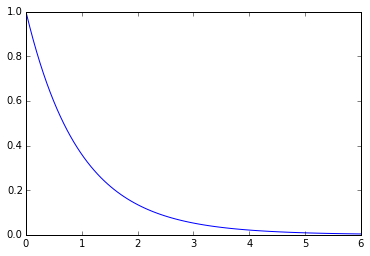

In [109]:
import numpy as np

grades = np.array([grades1, grades2, grades3])
groups = grades.size
samples = grades1.size

import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0.01, 6, num=100)
y = f.pdf(x, dfG, dfE)
plt.plot(x, y)

In [114]:
g_mean = grades.mean()
MSG = samples * sum([(g_mean - g.mean())**2 for g in grades]) / float(dfG)
MSE = (samples - 1) * sum([g.var(ddof=1) for g in grades]) / float(dfE)
print MSG / MSE, MSG, MSE

SSG = sum([g.size * (g_mean - g.mean())**2 for g in grades])
MSG = SSG / dfG

SST = sum([(g - g_mean)**2 for grade in grades for g in grade])
SSE = SST - SSG
MSE = SSE / dfE

F = MSG / MSE
print F, MSG, MSE

4.04712273544 296.858342155 73.3504668777
4.04712273544 296.858342155 73.3504668777


In [111]:
from scipy.stats import f
1.0 - f.cdf(F, dfG, dfE)

0.023894779607448235